In [573]:
# Importing Required Modules

## Mathematical functions from the standard library
# https://docs.python.org/3/library/math.html  
import math 

## Numerical structures and operations
# https://numpy.org/doc/stable/reference/index.html  
import numpy as np 

## Plotting
# https://matplotlib.org/stable/contents.html  
import matplotlib.pyplot as plt

## Random selections
# https://docs.python.org/3/library/random.html  
import random

## Permutations and combinations
# https://docs.python.org/3/library/itertools.html  
import itertools

import pandas as pd

### Statistics
import scipy.stats as stats  
import seaborn as sns 
import statistics


# Task 1

Task 1 - Permutations and Combinations  
Completed by: Rebecca Feeley  

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

## Task 1  Explanation and Planned Solution
This task is a proposed expansion of the famous Lady Tasting Tea test to involve 12 cups of tea, 6 of which have the milk added in first and 6 of which have the tea added in first.

This experiment, conducted and published by Ronald Fisher in 1935, set out to determine how the cups of tea should be prepared (i.e should they be randomised) in order to establish that the lady had a genuine ability to tell how the cups of tea were prepared rather than lucky guesses on the part of the lady.   
A key aspect of this experiment is the idea of the null hypothesis - that is an initial statement, as close to the real world application as possible, which is treated as true until it is proven otherwise. Fisher's null hypothesis was that the lady testing the tea did not have any unique ability to determine how the tea was prepared and that her claim to be able to do so was based on chance (i.e 'lucky guesses').    
Fisher firstly set out to determine the probability of idenifying the correct preparation of each cup based on chance alone. He determined this to be approximately 1 in 70. As the chance of the lady correctly idenitifying each cup was so low, when the lady correctly determined the preparation process of each cup, Fisher was then able to reject the null hypothesis and concluded that "her ability to discern the tea preparation was statistically significant."
However, as the lady was able to correctly determine the preparation process of each cup, Fisher rejected the null hypothesis.   


The first part of this task invloves calculating the probability that the person guesses each of the cups by chance, as Fisher set out to determine. 







In [574]:
# Number of cups of tea in total.
no_cups_total = 12

# Number of cups of tea with milk added first.
no_cups_milk_first = 6

# Number of cups of tea with tea added first.
no_cups_tea_first = 6

I have imported the math module to use the comb function to calculate the number of ways to choose k elements from a set of n elements where the order of the chosen elements does not matter and no element is selected more than once.
In this case, k elements refers to number of cups with milk added first and n elements is the total amount of cups.  

In [575]:
# Number of ways of selecting six cups from twelve using comb function
ways = math.comb(no_cups_total, no_cups_milk_first)

print ("The number of ways of selecting six cups from twelve is:", ways)

# This function could also be used to select six cups from twelve (i.e the six cups with the tea added first)

The number of ways of selecting six cups from twelve is: 924


Now that we have established how many ways of choosing six cups from twelve exist, we will look at the probability that a person tasting the tea would choose the correct six cups purely by chance. 

In [576]:
# To get the probability of choosing the correct six cups, we divide 1 by the number of ways 
# of selecting 6 separate cups from twelve
# We divide into 1 as this is considered the correct conbination, and we divide into this by the total number of combinations
# in order to get the probability of choosing the correct cups.

correct_guess = 1
probability_all_correct = correct_guess/ways 
print(f"Probability of selecting the correct 6 cups: {probability_all_correct:.10f}")

Probability of selecting the correct 6 cups: 0.0010822511


Another way to show the to demonstrate the different ways of selecting the cups with milk first out of the cups of tea (i.e selecting six cups out of 12 cups) is to give each cup a label

In [577]:
# assigning a label to each cup
labels = list(range(no_cups_total))

print("Each cup is labelled:", labels)

# Show the different ways of selecting cups with milk first out of the cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# 'combs' is commented out for clarity as it gives a long list of each of the ways of selecting 6 out of 12 cups
# combs

# Number of combinations of choosing 6 cups out of 12
len(combs)

Each cup is labelled: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


924

As is demonstrated above, there are 924 different ways of choosing 6 cups out of 12 cups. 

In order to determine the likelihood of the person making at most one error, I will simulate the guessing process of the lady by randomly assigning 6 cups out of the 12 to have the milk added first. 
Then, for each guessed set of six cups, I will determine how many of these cups match with the actual set of 6 cups chosen to have the milk added first. 

In [578]:
# Select six cups at random which have the milk added first (this changes each time the program is ran to ensure randomness)
labels_milk = random.sample(labels, 6)

# Putting the labels in order using the sort() function
labels_milk.sort()
print("The cups with milk added first are labelled:", labels_milk)


# creating a list to store the number of overlaps
no_overlaps = []

# using the for function to iterate through each combination in comb
for comb in combs:
    # Turn comb and labels_milk into sets.
    s1 = set(comb)
    s2 = set(labels_milk)
    # Determine where they overlap i.e the number of correct guesses in each combination
    overlap = s1.intersection(s2)
    # Adding the overlap to no_overlaps list
    no_overlaps.append(len(overlap))

# Count the number of times each overlap occurs
unique, counts = np.unique(no_overlaps, return_counts=True)

print("Number of correct guesses for each label : Frequency")
for u, c in zip(unique, counts):
    print(f"{u} : {c}")


The cups with milk added first are labelled: [1, 5, 8, 9, 10, 11]
Number of correct guesses for each label : Frequency
0 : 1
1 : 36
2 : 225
3 : 400
4 : 225
5 : 36
6 : 1


The results of the overlap code demonstrate the likelihood of how many correct cups a person will identify if guessing blindly. A person incorrectly identifying all cups with milk added first and correctly identifying all cups with milk added first are the most unlikely outcomes. 
A person determining 3 out of the 6 cups with milk added correctly is the most likely outcome.

## Visualising the results of the above code

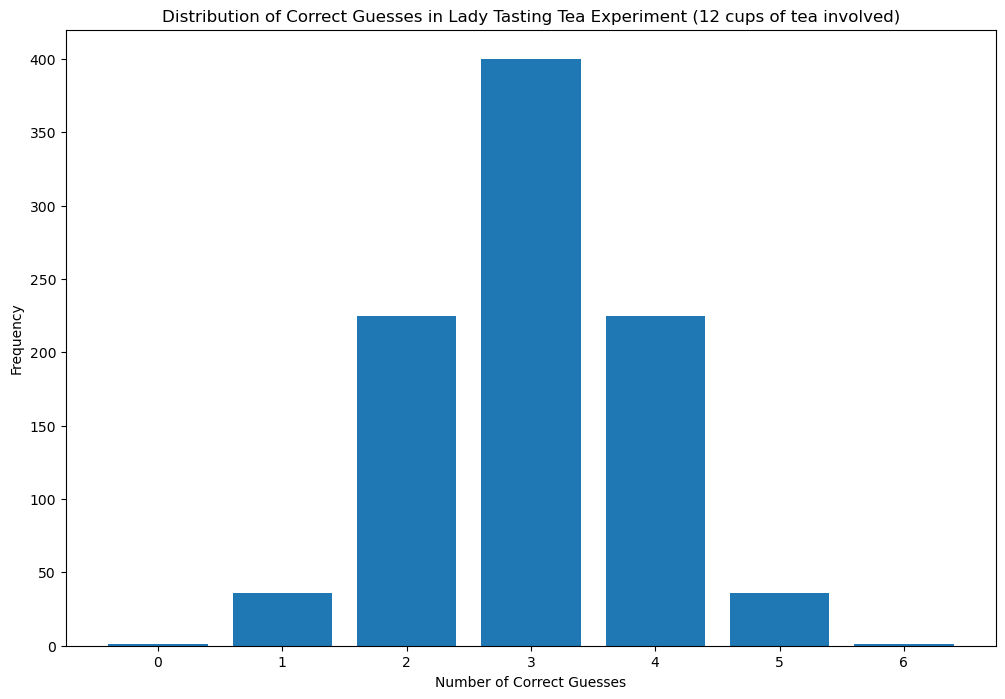

In [579]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(unique, counts)
ax.set_xlabel('Number of Correct Guesses')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Correct Guesses in Lady Tasting Tea Experiment (12 cups of tea involved)')
plt.show()

Now I will look at the probability of getting at most one error. The above code and bar chart shows the likelihood of getting 5 cups correct is 36. Thus, in order to determine the probability, of at most one error, this means the person could also make no error. 
So, it is the frequency of choosing 5 cups correct (36) and the frequency of choosing all cups correctly (1), divided by the total number of ways of choosing 6 cups. 

In [580]:
# Frequencies of getting 5 and 6 cups correct
count_5_correct = 36
count_6_correct = 1

# Probability of making at most one error
probability_one_or_less_errors = (count_5_correct + count_6_correct) / ways
print(f"Probability of making at most one error: {probability_one_or_less_errors:.10f}")


Probability of making at most one error: 0.0400432900


The problem also asks if I could accept 2 errors, so I am going to calculate the person making two errors when choosing the cups with milk added first.

In [581]:
# Frequencies of getting 5 and 6 cups correct
count_4_correct = 225


# Probability of making at most one error
probability_one_or_less_errors = (count_4_correct) / ways
print(f"Probability of making two errors: {probability_one_or_less_errors:.10f}")

Probability of making two errors: 0.2435064935


## Analysis of the probabilities

Firstly, looking at the probability of the lady choosing all 6 cups correctly is 0.0010822511 (i.e 1 in 924). As this is a very low probability of the lady simply guessing all 6 cups correctly, we could reject the null hypothesis that she has no special ability to determine which cups of tea had milk added first.   

Secondly, the probability of the lady making at most one error (i.e choosing at least 5 cups correctly or choosing all 6 cups correctly), is 0.0400432900. Again, this is a very low probability and again we could reject the null hypothesis.  

However, if the we look at the probability of lady making two errors (i.e choosing 4 cups correctly), the probability is 0.2435064935. This is an almost 1 in 4 chance (almost 25%) of her guessing 4 cups correctly. Thus, this probability is much higher and the likelihood of the woman simply guessing 4 cups correctly could be said to be more reasonably possible.


## Task 1 References 

https://www.acsh.org/news/2017/11/08/how-statistics-came-be-woman-and-cup-tea-12080#:~:text=With%2070%20possible%20combinations%2C%20there%20is%20exactly%20one,high%20to%20distinguish%20lucky%20guessing%20from%20actually%20knowing. 

https://statisticseasily.com/lady-tasting-tea/

https://docs.python.org/3/library/random.html#random.sample

# Task 2

In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.  

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.  

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.  

## Import required modules

In [582]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats

######
In order to check if the function numpy.random.normal() correctly generates normal values, I will complete the following:  
Firstly, I will generate a sample of one hundred thousand values using the function. The mean will be set at 10.0 and the standard deviation set to 3.0  
Then, I will use the scipy.stats.shapiro() function to test if the sample originates from a normal distribution.
I will then create a histogram of the generated values and overlay this with the probability density function of the corresponding normal distribution.

In [583]:
# I am generating a sample of one hundred thousand values with mean 10.0 and standard deviation 3.0
mean = 10.0
std_dev = 3.0
sample_size = 100000
sample_data = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

print("The sample data is:", sample_data)

The sample data is: [ 8.0121781  11.54475395 17.12067635 ... 12.53575908  8.68128994
  9.7126075 ]


Now, as per the task outline, I will use the scipy.stats.shapiro() function to determine if the sample_data comes from a normally distributed dataset. 

The above function is based on the Shapiro Wilk Test for Normality.  
There are two aspects to this test. Firstly, the Shapiro Wilk Test Statistic measures how closely the sample data matches a normal distribution, with a range from 0 to 1. The closer this result is to 1, the higher the likelihood that the data is normally disbuted.
The Shapiro Wilk Test also operates on the basis of the null hypothesis that the data sample is drawn from a normally distributed dataset. The p-value is a probability value which helps us to determine whether or not to reject the null hypothesis. The p-value also ranges from 0 to 1.
If the p-value is greater than 0.05, this means that we do not reject the null hypothesis, which indicates that the data sample is likely to have a normal distribution.


In [584]:
# Running the Shapiro test on the generated sample
shapiro_test = stats.shapiro(sample_data)

# Performing the Shapiro-Wilk test
print("Shapiro-Wilk Test Results are:")
print(f"Test Statistic: {shapiro_test.statistic:.6f}") #  this is a measure of how well the sample data fits a normal distribution (to 6 figures after decimanl point)
print(f"p-value: {shapiro_test.pvalue:.6f}") # if p value > 0.05, indicates the smaple likely comes from a normally distributed dataset.


Shapiro-Wilk Test Results are:
Test Statistic: 0.999960
p-value: 0.279410


### Analysis of the Shapiro-Wilk Test Results

The Shapiro Test Statistic result is 0.999966, which is very close to 1. The test statistic ranges from 0 to 1, with values closer to 1 indicating the the sample data aligns with a normal distribution. Thus, we could state that the sample data is very likely to be normally distributed.  

In addition, the p value is greater than 0.05, so it means we should not reject the null hypothesis (thus, in this case we can state that the data sample comes from normally distributed dataset). This aligns with what we would expect of the data as we used the numpy.random.normal fucntion to generate the sample data.  *may be an issue with large sizes for p values


Now, I will plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [585]:
# Plotting a histogram of the generated sample
# fig, ax = plt.subplots()

'''
x = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 100000)
#x = np.linspace(-10,30, 100000)
pdf = stats.norm.pdf(x, loc=mean, scale=std_dev)
plt.plot(x, pdf, 'r', label='Normal Distribution PDF')
'''

"\nx = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 100000)\n#x = np.linspace(-10,30, 100000)\npdf = stats.norm.pdf(x, loc=mean, scale=std_dev)\nplt.plot(x, pdf, 'r', label='Normal Distribution PDF')\n"

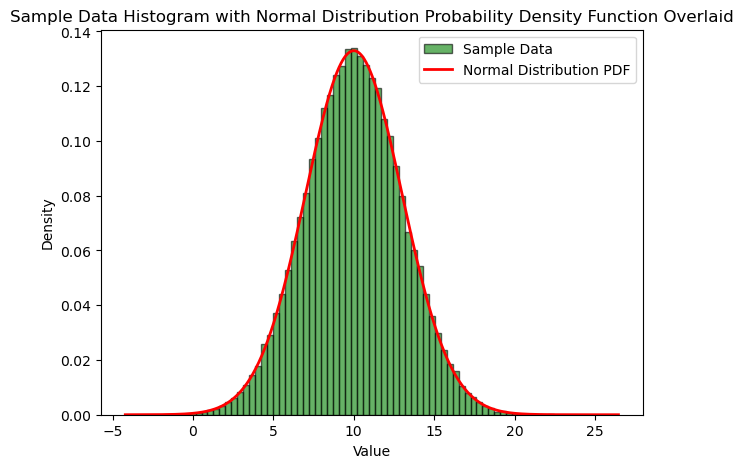

In [586]:
# Plot the histogram from the generated sample
plt.figure(figsize=(7, 5)) # setting the size of the figure
plt.hist(sample_data, bins=75, density=True, alpha=0.6, color="green", edgecolor="black", label="Sample Data")

# Density curve interval
xmin, xmax = plt.xlim() #storing the min and max values of the x-axis to plot the probability density function over the same interval as the histogram.
x = np.linspace(xmin, xmax, 1000)
p = stats.norm.pdf(x, mean, std_dev)

# Combine both the histogram and density curve interval
plt.plot(x, p, "r", linewidth=2, label="Normal Distribution PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.title("Sample Data Histogram with Normal Distribution Probability Density Function Overlaid")
plt.show() # show the graph

## Conclusion

Based on the results of the Shapiro-Wilk test, where the test statistic is very close to 1 and the p value is above 0.05, (meaning there is no reason to reject the null hypothesis i.e we can say the data is likely normally distributed), we can say that the data follows a normal distribution.  
Furthermore, using the visual aid of the histogram with the probability density function overlaid on it, we can clearly see this is an almost perfect fit and follows the typical 'bell curve' shape associated with normal distribution.  
Thus, we can say that numpy.random.normal() generates normally distributed values, based on the mean and standard deviation assigned.


## Task 2 References
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/


## Task 3

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic based on this data set, using Python.
Compare it to the value given by `scipy.stats`.
Explain your work and list any sources used.

The aim of this task is to determine whether there is any statistically significant difference in the two sets of data, the resting heart rate before and after an exercise program. We will then look at the difference, if any, that is produced by used the scipy.stats module to calculate the t-statistic.

To calculate the t-statistic, we will use the t-Test, in particular a paired t-test. This test compares the means of the same group at two different times, in the case the resting heart rate before completing an exercise regime and the resting heart rate after completing the exercise regime.

## Manually calculating t statistic
Firstly, I will manually calculate the t statistic using numpy. To do this, I will use the following formula for the paired t-test:

In [587]:
#https://stackoverflow.com/questions/2324438/how-to-calculate-the-statistics-t-test-with-numpy
# https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

#Calculation of t statistic using numpy
# Creation of the two arrays for t test calculation
rhrbefore = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
rhrafter = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

difference = rhrbefore - rhrafter #calculates the difference in the heart rates before and after and stores these values

meanDiff = np.mean(difference) # mean of the difference of the two different heart rate values per patient
stdDiff = np.std(difference) # standard deviation of the difference values

tstatistic = meanDiff/(difference.std(ddof=1)/np.sqrt(len(difference))) #ddof set to 1 to include Bessel's correction for working with sample data
#standard error of the mean difference
#calculated by dividing the standard deviation of the differences and into the sqrt function(calculates the square root of the amount of patients)

print(f"Manually calculated t-statistic is: {tstatistic:.5f}")

Manually calculated t-statistic is: 1.33723


# T test using Scipy.stats

Next, I will use the scipy.stats formula to caluclate the t statistic. 

####
This is a test for the null hypothesis that two related samples have the same mean. The samples are related in this instance as the values for resting heart rate taken before and after are taken from the same subject.

In [588]:
# Performing the paired t-test using scipy stats forumla
t_statistic, p_value = stats.ttest_rel(rhrbefore, rhrafter)
print(f"SciPy generated t-statistic: {tstatistic:.5f}")
print(f"p-value: {p_value:.5f}")

SciPy generated t-statistic: 1.33723
p-value: 0.21396


## Analysis of Results - Manual t statistic calculation versus scipy stats t statistic calculation

#### The manual t-statistic calculated using numpy is approximately:
Manual t statistic: 1.33723

#### The t-statistic calculated using SciPy's stats function is approximately:
SciPy t statistic: 1.33723

The above two figures are the same, demonstrating that the manual t statistic calculation and the SciPy t statistic calculation both yield the same result and confirming the accuracy of my calculations.   

I will now look at the p-value generated by the SciPy t-test to determine if the differnce in the heart rates is statistically significant and to determine if we can accept or reject the null hypothesis.    
The null hypothesis in this case is that any mean difference in resting heart rates before and after the exercise program is zero (essentially meaning that there is no difference in heart rate due to the exercise program and any change is due to random chance or other factors).  
The p-value in this case is 0.2140. As the p-value > 0.05, this is less than the significance level of 0.05. (The significance level represents a Confidence Interval of 95% - statistically significant).  
Thus, there is no evidence here to reject the null hypothesis and so we cannot say that there is any statistically significant difference between the two datasets to confirm the assertion that the exercise regime caused a change in the resting heartbeats of the patients involved.  


### References

# Task 4: ANOVA
In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.

#########
This task aims to estimate the probability of committing a type II error in specific circumstances.

Here, a type II error is the failure to reject a null hypothesis that is actually false (also called a false negative).

To estimate the probability of such errors occuring, I will create a variable called no_type_ii and set it to 0. I will then use a loop to perform the required test 10000 using the specific circumstances set out above in the task.
I will then use the stats.f_oneway function to perform one-way ANOVA testing on the three samples created.



In [ ]:
# Initialize this variable to zero so that it counts the type II errors committed
no_type_ii = 0

number_trials = 10000

# Set the significance level
alpha = 0.05

# defining a function to generate the samples and perform the anova test
def perform_simulation():
    # Generate 3 normally distributed random samples with 100 values each, a std deviation of 0.1 and varying means (4.9, 5.0 and 5.1)
    sample1 = np.random.normal(loc=4.9, scale=0.1, size=100)
    sample2 = np.random.normal(loc=5.0, scale=0.1, size=100)
    sample3 = np.random.normal(loc=5.1, scale=0.1, size=100)

    # Perform one-way ANOVA test using stats formula
    f_statistic, p_value = stats.f_oneway(sample1, sample2, sample3)

    # Check for Type II error
    return p_value > 0.05

# Looping the function to perform the test 10,000 times
for _ in range(number_trials):
    if perform_simulation():
        no_type_ii += 1
    

# Calculating the probability of committing a Type II error by dividing number type ii errors by thr number of trials
prob_type_ii_error = no_type_ii / number_trials

print(f"Number of Type II errors is: {no_type_ii}")
print(f"Probability of committing a Type II error is: {prob_type_ii_error:.5f}")


Number of Type II errors is: 0
Probability of committing a Type II error is: 0.00000
